**NL2DS - Winter 2025**

**Assignment 6 -- Language Phylogeny, Clustering**

Name: **Talia Cohen-Fette**

Student ID: **261018151**

This homework consists of 71 points, plus 4 points of extra credit.


There are two types of exercise:

* Some questions require writing code.  
  * Replace `# your code here` with your answer.  
  * The code block should run when all code above it in this file has also been run.  
  * If you skip some questions, it's your responsibility to make sure that all code blocks which you filled out still run.
* Some other questions require writing text.  
  * Replace "**put your answer here**" with your answer.

For coding questions:
* <font color='red'>**You may find code from the course CoLab notebooks -- and in particular the `Clustering` notebook (MyCourses->Content->Code Workbooks->Clustering) -- useful for this assignment.**</font>  
  * <font color='red'>**Do not reimplement any major functionality, such as calculating edit distance, linkage methods, clustering methods, etc.**</font>
* Following the contents of these CoLab notebooks, you should:
  * Use `sklearn` functionality as much as possible for machine learning tools. (For example, do not compute clusters using a different library.)
  * Use `pandas` functionalty as much as possible for basic data manipulation and analysis.
* Do not delete any code, unless it is marked as `# some code to get you started`.

Please make sure to follow directions carefully, including maximum lengths for text answers. Failure to follow directions may result in partial or no credit for the corresponding question.

**IMPORTANT: Make sure to correctly follow the instructions at the bottom on submitting your assignment, <font color='red'>INCLUDING MATCHING YOUR ANSWERS TO PDF PAGES WHEN SUBMITTING ON GRADESCOPE</font>. Failure to do so will result in <font color='red'>UP TO 10 POINTS BEING DEDUCTED</font>.**


# Section 1

In Sections 1-6 of the assignment we will look at some cross-linguistic word form data and use some of the tools we saw in class to build family trees of languages based on the sound forms of words---otherwise known as "optimal phylogenies."

We will use data from the following paper.


[Dellert, Johannes, Daneyko, T., Muench, A., Ladygina, A., Buch, A., Clarius, N., Grigorjew, I., Balabel, M., Boga, H. I., Baysarova, Z., Muehlenbernd, R., Wahle, J., and Jaeger, G. (2020). Northeuralex: A wide-coverage lexical database of northern eurasia. Language Resources & Evaluation, 54(273–301).](https://drive.google.com/file/d/1ptoMNctdJs99wPWfBUGbw4_X60NtKl9B/view?usp=sharing)

This data  can be found [here](http://northeuralex.org/) as well.

Copy the data to your drive folder from: [here](https://drive.google.com/file/d/1Mfa8XayBFJb0fY8wfinODw90yuRal8AD/view?usp=sharing), [here](https://drive.google.com/file/d/1AQqkscWKlq3quw-BWjB8xqSQzm7-uDtt/view?usp=sharing), and [here](https://drive.google.com/file/d/1R7ZLEzDW9QKUen3BjItPsySaUPCpu7xk/view?usp=sharing).

## Question 1 (3 points)

Read the paper and/or Northeuralex's website as much as necessary to answer this question.

**Question:** What is the Northeuralex dataset? Give a brief overview, including:
* What kind of data is it?
* What is the purpose of this data (what sorts of scientific questions or practical applications will it be used to address)?
* How was it constructed?

 Your answer should not refer to low-level details, such as file names or what columns are present in different files.  Just give an overview of no more than one paragraph that gives the gist for someone unfamiliar with the dataset.

**A1: NorthEuraLex is a wide-coverage lexical database of 107 languages from Northern Eurasia, designed to support computational research in historical linguistics. It contains phonetic transcriptions of basic vocabulary across over a thousand core concepts, enabling the analysis of language relationships, lexical borrowing, and sound change patterns. The dataset supports studies in language phylogeny and contact by providing a standardized, machine-readable format for comparing word forms across diverse language families. It was constructed by systematically extracting and transcribing data from dictionaries, with phonetic forms generated using automated rules, and is continuously refined with expert feedback.**

## Question 2 (3 points)

Now, let's read in the wordforms in this dataset.

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

import pandas as pd
wordforms=pd.read_csv("/content/drive/My Drive/northeuralex.csv")
display(wordforms)

Mounted at /content/drive/


,Language_ID,Glottocode,Concept_ID,Word_Form,rawIPA,IPA,ASJP,List,Dolgo,Next_Step
0,fin,finn1318,Auge::N,silmä,silmæ,s i l m æ,silmE,SILME,SVRMV,validate
1,fin,finn1318,Ohr::N,korva,kɔrʋɑ,k ɔ r ʋ ɑ,korwa,KURWA,KVRWV,validate
2,fin,finn1318,Nase::N,nenä,nɛnæ,n ɛ n æ,nEnE,NENE,NVNV,validate
3,fin,finn1318,Mund::N,suu,suː,s u u,su,SY,SV,validate
4,fin,finn1318,Zahn::N,hammas,hɑmːɑs,h ɑ m m ɑ s,hamas,HAMAS,HVMVS,validate
...,...,...,...,...,...,...,...,...,...,...
121608,cmn,mand1415,verkaufen::V,卖,mâɪ̯,m a ɪ,mai,MAI,MV,validate
121609,cmn,mand1415,bezahlen::V,付钱,fû t͡ɕʰjɛ̌n,f u _ t͡ɕ ʰ j ɛ n,fuCyEn,BY_CJE2N,PV_KJV1N,validate
121610,cmn,mand1415,zahlen::V,支付,t͡ʂɨ˦fû,t ʂ ɨ f u,C3fu,CI1BY,KV1PV,validate
121611,cmn,mand1415,beherrschen::V,统治,tʰʊ̂̌ŋt͡ʂɨ̂,tʰ ʊ ŋ t ʂ ɨ,tuNC3,TY2NCI,TV1NKV,validate


**Question:** Describe the meaning of the `Language_ID`, `Concept_ID`, `rawIPA` and `IPA` columns of the data.  Why are there separate `rawIPA` and `IPA` columns?

**A2: Language_ID identifies the language of the wordform using a standardized short code. Concept_ID indicates the meaning expressed by the wordform, typically in German with part-of-speech tags. rawIPA contains the phonetic transcription as originally derived from source materials or automated rules, potentially with inconsistencies. IPA provides a cleaned and standardized phonetic transcription in space-separated IPA symbols for computational processing. The separate rawIPA and IPA columns exist to distinguish between initial, possibly noisy phonetic data and the standardized forms used for analysis.**

## Question 3 (2 points)

Now let's read in some metadata about the languages.

In [2]:
languages=pd.read_csv("/content/drive/My Drive/northeuralex-languages.csv")
display(languages)

,name,glotto_code,iso_code,family,subfamily,latitude,longitude
0,Finnish,finn1318,fin,Uralic,Finnic,61.0000,24.4500
1,North Karelian,kare1335,krl,Uralic,Finnic,65.1691,30.8655
2,Olonets Karelian,livv1243,olo,Uralic,Finnic,61.0000,33.0000
3,Veps,veps1250,vep,Uralic,Finnic,60.3353,34.7865
4,Estonian,esto1258,ekk,Uralic,Finnic,59.2500,24.7500
...,...,...,...,...,...,...,...
102,Dargwa,darg1241,dar,Nakh-Daghestanian,Daghestanian,42.4257,47.4388
103,Chechen,chec1245,che,Nakh-Daghestanian,Nakh,43.5000,45.5000
104,Standard Arabic,stan1318,arb,Afro-Asiatic,Semitic,27.9625,43.8525
105,Modern Hebrew,hebr1245,heb,Afro-Asiatic,Semitic,31.1056,35.0179


**Question:** Describe the meaning of the `family`, `iso_code`, and `subfamily` columns of the data.  

**A3: family indicates the broad language family to which a language belongs, such as Uralic, Turkic, or Indo-European. iso_code is a standardized three-letter code that uniquely identifies each language. subfamily specifies a more fine-grained classification within a family, grouping languages into smaller related clusters.**

## Question 4 (2 points)

Now let's read in some further data about the concepts.

In [3]:
concepts=pd.read_csv("/content/drive/My Drive/northeuralex-concepts.csv")
display(concepts)

,number,position_in_ranking,ranking_value,id_nelex,gloss_en,gloss_ru,annotation_en,annotation_en.1,annotation_ru,concepticon,concepticon_id,concepticon_proposed,comments
0,1,44,"-2,539237",Auge::N,eye,глаз,[[Anatomie]],[[anatomy]],[[анатомия]],EYE,1248,EYE,NaN
1,2,34,"-2,649194",Ohr::N,ear,ухо,[[Anatomie]],[[anatomy]],[[анатомия]],EAR,1247,EAR,NaN
2,3,149,"-1,995463",Nase::N,nose,нос,[[Anatomie]],[[anatomy]],[[анатомия]],NOSE,1221,NOSE,NaN
3,4,25,"-2,762589",Mund::N,mouth,рот,[[Anatomie]],[[anatomy]],[[анатомия]],MOUTH,674,MOUTH,NaN
4,5,31,"-2,670705",Zahn::N,tooth,зуб,[BSP:menschlicher Schneidezahn],[EX:human incisor],[НАПР:человека],TOOTH,1380,TOOTH,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1011,1012,140,"-2,029052",verkaufen::V,sell,продать,[BSP:Ware],[EX:goods],[НАПР:товар],SELL,1571,SELL,NaN
1012,1013,198,"-1,822012",bezahlen::V,pay for,заплатить,[BSP:Ware],[EX:goods],[НАПР:за товар],NaN,0,PAY_FOR,NaN
1013,1014,235,"-1,715766",zahlen::V,pay,платить,[BSP:im Restaurant],[EX:in a restaurant],[НАПР:в ресторане],PAY,718,PAY,NaN
1014,1015,899,"0,118183",beherrschen::V,rule,владеть,[BSP:Land],[EX:country],[НАПР:страной],RULE,1846,RULE,NaN


**Question:** Describe the meaning of the `id_nelex`, `gloss_en`, and `position_in_ranking` columns of the data.

**A4: id_nelex is the unique identifier for each concept in the NorthEuraLex dataset, typically combining a word and its part of speech. gloss_en provides the English translation or label for the concept. position_in_ranking indicates the concept's relative basicness or stability, with lower numbers representing more basic or stable vocabulary items.**

# Section 2

## Question 5 (2 points)

It will be useful to merge all of the meta-information into the main wordforms dataframe.

In [4]:
# Question-a: rename the appropriate columns in the languages and concepts dataframes to make this merge possible.
languages_df_renamed = languages.rename(columns={"iso_code": "Language_ID"})
concepts_df_renamed = concepts.rename(columns={"id_nelex": "Concept_ID"})

# Question-b: Use the pd.merge function to merge the three dataframes into one.
wordforms_merged = pd.merge(wordforms, languages_df_renamed, on="Language_ID", how="left")
wordforms_merged = pd.merge(wordforms_merged, concepts_df_renamed, on="Concept_ID", how="left")

display(wordforms_merged)

,Language_ID,Glottocode,Concept_ID,Word_Form,rawIPA,IPA,ASJP,List,Dolgo,Next_Step,...,ranking_value,gloss_en,gloss_ru,annotation_en,annotation_en.1,annotation_ru,concepticon,concepticon_id,concepticon_proposed,comments
0,fin,finn1318,Auge::N,silmä,silmæ,s i l m æ,silmE,SILME,SVRMV,validate,...,"-2,539237",eye,глаз,[[Anatomie]],[[anatomy]],[[анатомия]],EYE,1248,EYE,NaN
1,fin,finn1318,Ohr::N,korva,kɔrʋɑ,k ɔ r ʋ ɑ,korwa,KURWA,KVRWV,validate,...,"-2,649194",ear,ухо,[[Anatomie]],[[anatomy]],[[анатомия]],EAR,1247,EAR,NaN
2,fin,finn1318,Nase::N,nenä,nɛnæ,n ɛ n æ,nEnE,NENE,NVNV,validate,...,"-1,995463",nose,нос,[[Anatomie]],[[anatomy]],[[анатомия]],NOSE,1221,NOSE,NaN
3,fin,finn1318,Mund::N,suu,suː,s u u,su,SY,SV,validate,...,"-2,762589",mouth,рот,[[Anatomie]],[[anatomy]],[[анатомия]],MOUTH,674,MOUTH,NaN
4,fin,finn1318,Zahn::N,hammas,hɑmːɑs,h ɑ m m ɑ s,hamas,HAMAS,HVMVS,validate,...,"-2,670705",tooth,зуб,[BSP:menschlicher Schneidezahn],[EX:human incisor],[НАПР:человека],TOOTH,1380,TOOTH,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121608,cmn,mand1415,verkaufen::V,卖,mâɪ̯,m a ɪ,mai,MAI,MV,validate,...,"-2,029052",sell,продать,[BSP:Ware],[EX:goods],[НАПР:товар],SELL,1571,SELL,NaN
121609,cmn,mand1415,bezahlen::V,付钱,fû t͡ɕʰjɛ̌n,f u _ t͡ɕ ʰ j ɛ n,fuCyEn,BY_CJE2N,PV_KJV1N,validate,...,"-1,822012",pay for,заплатить,[BSP:Ware],[EX:goods],[НАПР:за товар],NaN,0,PAY_FOR,NaN
121610,cmn,mand1415,zahlen::V,支付,t͡ʂɨ˦fû,t ʂ ɨ f u,C3fu,CI1BY,KV1PV,validate,...,"-1,715766",pay,платить,[BSP:im Restaurant],[EX:in a restaurant],[НАПР:в ресторане],PAY,718,PAY,NaN
121611,cmn,mand1415,beherrschen::V,统治,tʰʊ̂̌ŋt͡ʂɨ̂,tʰ ʊ ŋ t ʂ ɨ,tuNC3,TY2NCI,TV1NKV,validate,...,"0,118183",rule,владеть,[BSP:Land],[EX:country],[НАПР:страной],RULE,1846,RULE,NaN


## Question 6 (2 points)

In this problem set, we will make use of the `lingpy` package of tools for historical linguistics. You can find more information on this [here](ttps://lingpy.org/index.html). We'll start by installing the package.

In [5]:
!pip install lingpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 9.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 602.4/602.4 kB 30.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 55.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.1/94.1 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.4/213.4 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 561.4/561.4 kB 36.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 565.1/565.1 kB 36.6 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=018978f063bb932d307776c5ce542542ba674fe190dd6ca248b33972d6a1ea20
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae37

In order to make our computations below more manageable, we will focus on the **Indo-European** languages which you can read more about [here](https://en.wikipedia.org/wiki/Indo-European_languages). We will also focus just on the top 20 concepts as determined by their rank. Please do not make any changes to the `wordforms` dataframe, and instead, create a new dataframe called `wordforms_20`.

In [6]:
# Question-a: Filter out the non-Indo-European languages from the dataframes
indo_european_df = wordforms_merged[wordforms_merged["family"] == "Indo-European"]

# Question-b: Filter the concepts to include those less than or equal to rank 20 in the dataframe.
wordforms_20 = indo_european_df[indo_european_df["position_in_ranking"] <= 20]

display(wordforms_20)

,Language_ID,Glottocode,Concept_ID,Word_Form,rawIPA,IPA,ASJP,List,Dolgo,Next_Step,...,ranking_value,gloss_en,gloss_ru,annotation_en,annotation_en.1,annotation_ru,concepticon,concepticon_id,concepticon_proposed,comments
30428,ben,beng1280,Wasser::N,জল,d͡ʒɔl,d͡ʒ ɔ l,jol,CUL,KVR,validate,...,"-2,92383",water,вода,[kaltes Wasser],[cold water],[холодная вода],WATER,948,WATER,NaN
30571,ben,beng1280,Sohn::N,ছেলে,t͡ʃʰele,t͡ʃ ʰ e l e,Cele,CELE,KVRV,validate,...,"-2,902475",son,сын,[],[],[],SON,1620,SON,NaN
30823,ben,beng1280,Tag::N,দিন,d̪in,d i n,din,TIN,TVN,validate,...,"-3,008012",day,день,[],[],[],DAY_(NOT_NIGHT),1225,DAY_(NOT_NIGHT),NaN
30982,ben,beng1280,hier::ADV,এখানে,ekʰane,e kʰ a n e,ekane,EKANE,VKVNV,validate,...,"-2,945985",here,здесь,[],[],[],HERE,136,HERE,NaN
30985,ben,beng1280,dort::ADV,ওখানে,okʰane,o kʰ a n e,okane,UKANE,VKVNV,validate,...,"-2,964168",there,там,[],[],[],THERE,1937,THERE,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73176,ron,roma1327,zwei::NUM,doi,doj,d o j,doy,TUJ,TVJ,validate,...,"-3,252278",two,два,[],[],[],TWO,1498,TWO,NaN
73184,ron,roma1327,zehn::NUM,zece,zet͡ʃe,z e t͡ʃ e,zeCe,SECE,SVKV,validate,...,"-3,174243",ten,десять,[],[],[],TEN,1515,TEN,NaN
73320,ron,roma1327,kommen::V,veni,venʲ,v e nʲ,ven,BEN,WVN,validate,...,"-2,955592",come,прийти,[sich hierher begeben],[move here],[двигаться сюда],COME,1446,COME,NaN
73456,ron,roma1327,nehmen::V,lua,lwa,l w a,lwa,LWA,RWV,validate,...,"-3,037664",take,взять,[],[],[],TAKE,1749,TAKE,NaN


# Section 3

## Question 7 (6 points)

Our goal is to use agglomerative clustering to try to reconstruct the tree for the Indo-European languages. You can find a reference tree (for families) [here](https://en.wikipedia.org/wiki/Indo-European_languages#/media/File:IndoEuropeanLanguageFamilyRelationsChart.jpg).

In order to do this, we will need to construct a  matrix of similarities between the languages, called a confusion matrix.

We will compute the (normalized) levenshtein distance between the strings for each concept for each pair of languages. For instance, we will compute the normalized levenshtein distance between the words for Wasser::N (water in English) for German and English and then similarily for all 19 other concepts. If there are multiple words for the same concept, take the average across all pair possibilities. We will then average these values (i.e., average across all concepts) to find the similarity between German and English. We will do this for all pairs of languages to create a list of lists representing the confusion matrix.

Note that running your code will take a few minutes.

**Hint**: Make use of the `lp.align.pairwise.edit_dist` function from lingpy.

In [ ]:
import lingpy as lp
import numpy as np

# Question: fill the confusion matrix on the "IPA" fields for each language.

# Initialize confusion matrix
language_list = sorted(wordforms_20["Language_ID"].unique().tolist()) # Initialize list of languages in the current modified wordforms dataset
confusion = [[0 for j in range(len(language_list))] for i in range(len(language_list))]
ipa_grouped = wordforms_20.groupby(["Language_ID", "Concept_ID"])["IPA"].apply(list)

for i, language1 in enumerate(language_list):
  for j, language2 in enumerate(language_list):
    if i > j:
      confusion[i][j] = confusion[j][i]
      continue
    distances = []
    for concept in wordforms_20["Concept_ID"].unique():
      words1 = ipa_grouped.get((language1, concept), [])
      words2 = ipa_grouped.get((language2, concept), [])
      if not words1 or not words2:
        continue
      pairwise = []
      for w1 in words1:
        for w2 in words2:
          dist = lp.align.pairwise.edit_dist(w1.replace(" ", ""), w2.replace(" ", ""), normalized=True)
          pairwise.append(dist)
      if pairwise:
        distances.append(np.mean(pairwise))
    confusion[i][j]= confusion[j][i] = np.mean(distances) if distances else 1.0

**After running this cell, clear the *output* of the above cell (by clicking on the cross at top left of the output part) so that it doesn't clutter the pdf.**

## Question 8 (2 points)

Now that we have computed a matrix of similarities, we can use clustering algorithms to try to build phylogenetic trees representing the languages historical relationships. First, let's use the `lp.algorithm.clustering.flat_cluster` function from `lingpy` to derive a flat clustering of languages.


In [8]:
cluster = lp.algorithm.clustering.flat_cluster('upgma', 0.6, confusion, language_list)
print(cluster)

{1: ['ben'], 2: ['bre'], 4: ['cat'], 5: ['ces', 'ukr', 'bel', 'rus', 'pol', 'slk', 'bul', 'hrv', 'slv'], 6: ['cym'], 7: ['dan', 'nor', 'swe'], 8: ['deu'], 9: ['ell'], 10: ['eng'], 11: ['fra'], 12: ['gle'], 13: ['hin'], 15: ['hye'], 16: ['isl'], 17: ['ita', 'spa'], 18: ['kmr'], 19: ['lat'], 20: ['lav', 'lit'], 22: ['nld'], 24: ['oss'], 25: ['pbu'], 26: ['pes'], 28: ['por'], 29: ['ron'], 34: ['sqi']}


**Question:** Do you recognize any of the clusters of languages? Are there any noteworthy errors in this clustering?  (You may first need to learn a bit about Indo-European languages.)

**A8: Yes, several clusters align well with known Indo-European subgroups: for example, ['dan', 'nor', 'swe'] groups the North Germanic languages, and ['ita', 'spa'] are both Romance languages. The large cluster with ['ces', 'ukr', 'bel', 'rus', 'pol', 'slk', 'bul', 'hrv', 'slv'] correctly includes many Slavic languages, although combining South, West, and East Slavic branches may not be specific enough. A potential issue is that ['fra'], ['por'], and ['ron']- all Romance languages- are split into separate clusters, which could suggest underestimation of their similarity.**


# Section 4

## Question 9 (2 points)

Now we will build our own dendrogram using the clustering algorithms available in [`scipy`](https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html). You can read in particular about the [`linkage`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html) function and the [`dendrogram`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html) function.

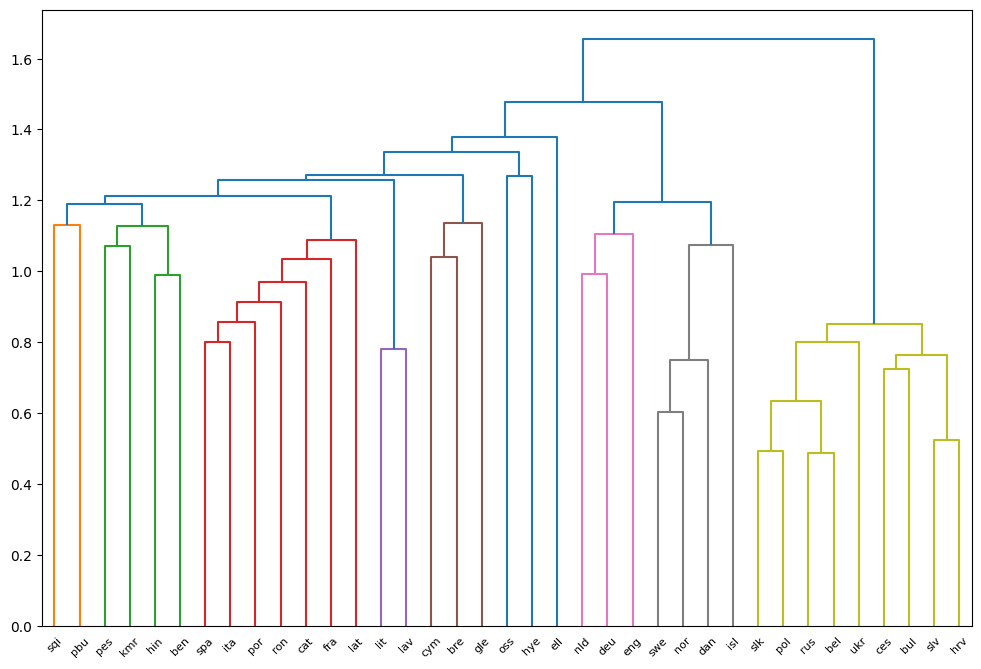

In [9]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import v_measure_score
import matplotlib.pyplot as plt

# Question: use the linkage function with the average linkage method to compute the clustering.

linked = linkage(confusion, method='average')


# Plot the results using dendrogram
def llf(id): return language_list[id]
plt.figure(figsize=(12, 8))
dendrogram(linked,
           p=100,
           truncate_mode="level",
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=False,
           leaf_label_func=llf)

plt.show()

## Question 10 (2 points)

**Question:** Do you recognize any of the clusters of languages at any of the levels? Are there any noteworthy errors in this clustering?

**A10: Yes, the dendrogram shows a clear cluster of Slavic languages (like rus, ukr, pol, bul, hrv), which is linguistically accurate. There's also a reasonable Romance cluster (spa, ita, fra, por, ron, cat), though some languages like lat (Latin) appear a bit far from that group, which might reflect its more antiquated vocabulary. One potential issue is the placement of eng (English), which, while Germanic, sometimes drifts due to its heavy borrowing from Romance languages.**

# Section 5

## Question 11 (4 points)
(2 points for code, 2 points for text answer)

**Question-a:** Try two of the other linkage methods.

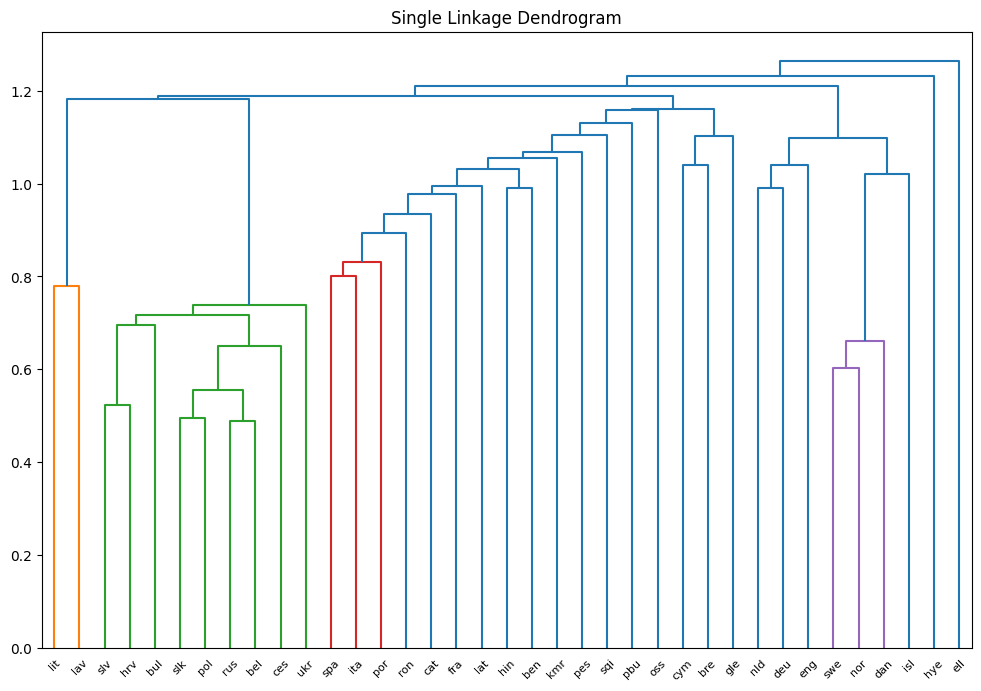

In [10]:
# Question-a: other method 1
linked_single = linkage(confusion, method='single')
def llf(id): return language_list[id]
plt.figure(figsize=(12, 8))
dendrogram(linked_single,
           p=100,
           truncate_mode="level",
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=False,
           leaf_label_func=llf)
plt.title('Single Linkage Dendrogram')
plt.show()

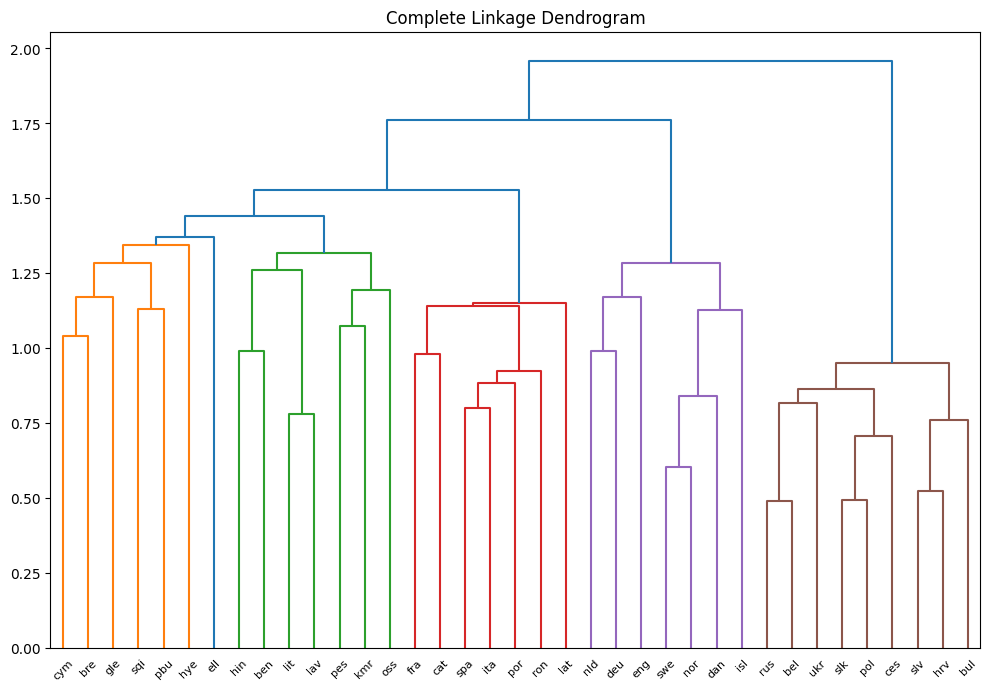

In [11]:
# Question-a: other method 2
linked_complete = linkage(confusion, method='complete')
plt.figure(figsize=(12, 8))
dendrogram(linked_complete,
           p=100,
           truncate_mode="level",
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=False,
           leaf_label_func=llf)
plt.title('Complete Linkage Dendrogram')
plt.show()

**Question-b:** Describe how they change the results.

**A11: The single linkage method tends to produce long, chain-like clusters, which leads to less distinct groupings; languages are often added one by one to clusters based on their nearest neighbor, even if the overall group isn't cohesive. In the dendrogram, this results in many shallow merges and a more stretched-out tree, which may not reflect historical or linguistic families well. On the other hand, the complete linkage method creates tighter, more compact clusters by merging based on the farthest pairwise distance, resulting in more clearly defined language families. Compared to the average linkage method, which balances between single and complete, these two methods either under-cluster (single) or over-cluster (complete), altering how well they match linguistic expectations.**

## Question 12 (4 points)
(2 points for code, 2 points for text answer)

**Question-a:** Try increasing the number of concepts we use to compute our confusion matrix to be **50**.

**Note:** Include all the code in separate cells like below. Make sure to define new variables so the previous variables (e.g., `wordforms_20`, `language_list`, `confusion` matrix, etc.) are not re-assigned.

In [12]:
# Question-a
top_50_concepts = wordforms["Concept_ID"].value_counts().nlargest(50).index
wordforms_50 = wordforms[wordforms["Concept_ID"].isin(top_50_concepts)].copy()

In [13]:
language_list_50 = sorted(wordforms_50["Language_ID"].unique().tolist())
confusion_50 = [[0 for _ in range(len(language_list_50))] for _ in range(len(language_list_50))]
ipa_grouped_50 = wordforms_50.groupby(["Language_ID", "Concept_ID"])["IPA"].apply(list)
wordforms_50["IPA"] = wordforms_50["IPA"].fillna("").astype(str)
for i, lang1 in enumerate(language_list_50):
  for j, lang2 in enumerate(language_list_50):
    if i > j:
      confusion_50[i][j] = confusion_50[j][i]
      continue
      distances = []
      for concept in top_50_concepts:
        words1 = ipa_grouped_50.get((lang1, concept), [])
        words2 = ipa_grouped_50.get((lang2, concept), [])
        if not words1 or not words2:
          continue
        pairwise = [
            lp.align.pairwise.edit_dist(str(w1).replace(" ", ""), str(w2).replace(" ", ""), normalized=True)
            for w1 in words1 for w2 in words2
        ]
        if pairwise:
          distances.append(np.mean(pairwise))
      confusion_50[i][j] = confusion_50[j][i] = np.mean(distances) if distances else 1.0

In [14]:
cluster_50 = lp.algorithm.clustering.flat_cluster('upgma', 0.6, confusion_50, language_list_50)
print(cluster_50)

{0: ['abk', 'ady', 'ain', 'ale', 'arb', 'ava', 'azj', 'bak', 'bel', 'ben', 'bre', 'bsk', 'bua', 'bul', 'cat', 'ces', 'che', 'chv', 'ckt', 'cmn', 'cym', 'dan', 'dar', 'ddo', 'deu', 'ekk', 'ell', 'enf', 'eng', 'ess', 'eus', 'evn', 'fin', 'fra', 'gld', 'gle', 'heb', 'hin', 'hrv', 'hun', 'hye', 'isl', 'ita', 'itl', 'jpn', 'kal', 'kan', 'kat', 'kaz', 'kca', 'ket', 'khk', 'kmr', 'koi', 'kor', 'kpv', 'krl', 'lat', 'lav', 'lbe', 'lez', 'lit', 'liv', 'mal', 'mdf', 'mhr', 'mnc', 'mns', 'mrj', 'myv', 'nio', 'niv', 'nld', 'nor', 'olo', 'oss', 'pbu', 'pes', 'pol', 'por', 'ron', 'rus', 'sah', 'sel', 'sjd', 'slk', 'slv', 'sma', 'sme', 'smj', 'smn', 'sms', 'spa', 'sqi', 'swe', 'tam', 'tat', 'tel', 'tur', 'udm', 'ukr', 'uzn', 'vep', 'xal', 'ykg', 'yrk', 'yux']}


**Question-b:** Does increasing from top 20 concepts to top 50 change the results?

**A12: Increasing from the top 20 to the top 50 concepts significantly changes the clustering results by introducing many more singleton clusters and breaking up previously larger clusters. For example, the large Slavic cluster from the top 20 (including 'ces', 'ukr', 'bel', 'rus', 'pol', 'slk', 'bul', 'hrv', 'slv') is split into several smaller clusters like ['ces', 'slk'], ['bel', 'ukr'], and others becoming singletons. This suggests that using more concepts increases sensitivity to phonetic differences, leading to finer-grained but possibly less cohesive clusters.**

# Section 6

Let's evaluate the quality of the clustering from Question 8, relative to one of the class labels we have: `subfamily`. In other words: the clustering we implement in Question 8 gives us some clusters of languages, that you may recognize as relating to language families/subfamilies. Given the ground truth we have in the `subfamily` labels, how well does our clustering do?

## Question 13 (6 points)
(4 points for code, 2 points for text answer)

Write code to compute the V measure score for this clustering relative to `subfamily`, then print them. Note that when using the `v_measure_score` function, you DO NOT need to standardize and align the cluster names/labels. (For example, it's okay if your 'true' cluster labels are encoded as strings, and your 'predicted' cluster labels are encoded as integers.)

In [15]:
# Question-a
# save the V measure score as v_measure_subfamily

from sklearn.metrics import v_measure_score

lang_to_cluster = {lang: cluster_id for cluster_id, langs in cluster.items() for lang in langs}
true_labels = [wordforms_merged[wordforms_merged["Language_ID"] == lang]["subfamily"].iloc[0] for lang in language_list]
pred_labels = [lang_to_cluster[lang] for lang in language_list]
v_measure_subfamily = v_measure_score(true_labels, pred_labels)

print(v_measure_subfamily)

0.7859172484406843


**Question-b:** Intrepret the `v_measure_subfamily` you printed above. Was your clustering in Question 8 good enough?

**A13: The V-measure score of 0.786 indicates that the clustering in Question 8 aligns well with known linguistic subfamilies. This suggests the clustering was reasonably effective at capturing historical language relationships based on phonetic similarity.**

# Section 7

In the remainder of this assignment, you'll use vowel duration and formant data like **the Classification and Clustering notebooks (MyCourses -> Content -> Code Workbooks)**---except from a mystery language, where the labels are unknown.  

Our data file, `mystery_vowels.csv`, gives duration, F1, F2, F3, and F4 values for vowel measurements from this language.  Note the lack of `speaker` and `vowel` columns: you don't know how many speakers this data came from and how many vowel categories there are.

Your goal is to determine $k$, the number of vowel categories.

Copy the data to your Drive folder from [here](https://drive.google.com/file/d/1lL62Su-GGSNZTzvp-7MgWLmZQXVBvPhm/view?usp=sharing).


In [16]:
# This cell throws an error if your Drive folder doesn't contain mystery_vowels.csv
from google.colab import drive
drive.mount('/content/drive/')
!ls "/content/drive/My Drive/mystery_vowels.csv"


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
'/content/drive/My Drive/mystery_vowels.csv'


Load the data:

In [17]:
import pandas as pd
mystery_vowels = pd.read_csv("/content/drive/My Drive/mystery_vowels.csv")

display(mystery_vowels)


,dur,F1,F2,F3,F4
0,72.842105,560.789474,1308.052632,2174.789474,3430.157895
1,103.264151,637.358491,1313.094340,2145.320755,3398.566038
2,154.130435,514.652174,1631.217391,2394.652174,3384.173913
3,153.190476,315.857143,2042.190476,2614.714286,3398.857143
4,99.733333,539.533333,1031.466667,2047.000000,3221.466667
...,...,...,...,...,...
115,91.670213,621.234043,1373.117021,2472.691489,3409.840426
116,80.571429,527.047619,1755.571429,2605.095238,3500.119048
117,94.387097,374.048387,2029.306452,2685.483871,3479.080645
118,97.612903,518.838710,1071.129032,2600.193548,3356.806452


We will call this data `X`, just for consistency with our other CoLab notebooks.

In [18]:
X = mystery_vowels

Plot the data:  

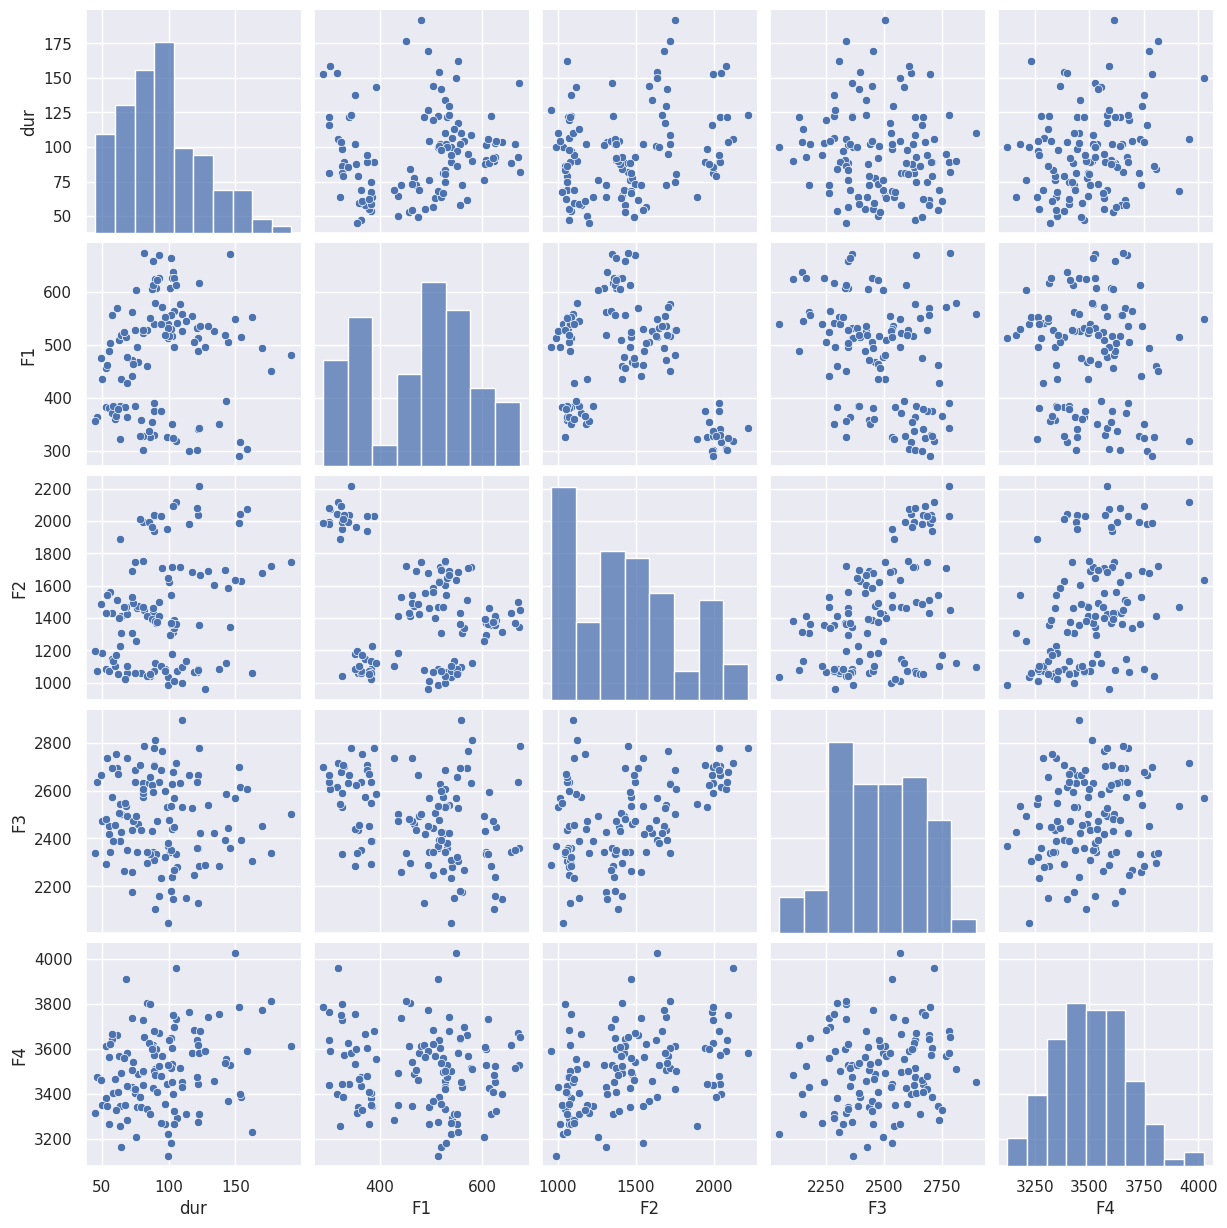

In [19]:
import seaborn as sns; sns.set()
sns.pairplot(X, vars=['dur', 'F1', 'F2','F3','F4'])

Note that we don't color by `vowel` label, unlike the English vowels data, because we don't know what vowel each token correpsonds to.

## Question 14 (2 points)

Choose two variables (= a diagonal panel) or pairs of variables (= an off-diagonal panel) where the data looks _most_ separated into clusters.  What two panels did you choose, and what values of $k$ do you guess?

**A14:**
*   The diagonal panel for F1 shows a clear multimodal distribution, suggesting approximately 3 clusters based on formant frequency alone.

*   The off-diagonal panel for F1 vs. F2 also reveals some distinct groupings, supporting a guess of 4 clusters in total.

## Question 15 (2 points)

When working with the English vowel data, we got the best performance by normalizing each column of `X` in a specific way.  Explain why it isn't possible to perform this normalization for our current dataset.

**A15: It is not possible to perform speaker-based normalization because the dataset lacks speaker identity information, so we cannot compute or subtract speaker-specific means.**

# Section 8

We will try two methods for determining the number of categories: $k$-means and GMM clustering.   

**Notes for the remainder of this assignment**:

* Every time you run $k$-means or GMM clustering, you should use the arguments `n_init = 10` and `random_state = 42`.  
  * These values make sure that your clustering finds the global minimum, and that we'll get the same "random" value for grading purposes.

* Any method you use should not divide the data (i.e. into train/test or "folds" for cross-validation): we are training and testing on the same data.

  * This makes the code maximally parallel to the Classification CoLab notebook.



## Question 16 (2 points)

As a warm-up, let's do $k$-means clustering with the value of $k$ that seems most likely to you from Q14.  

Define a variable  `k_q14`which is set to your guess for $k$.

Then:

* Perform $k$-means clustering using this $k$, and save the result as `kmeans_q16`.
* Make a vector `y_kmeans_q16` of the category labels predicted by this clustering.

In [20]:
# Question
# Make sure to use the arguments `n_init = 10` and `random_state = 42` for clustering

from sklearn.cluster import KMeans
k_q14 = 4
kmeans_q16 = KMeans(n_clusters=k_q14, n_init=10, random_state=42)
kmeans_q16.fit(X)
y_kmeans_q16 = kmeans_q16.labels_

print(y_kmeans_q16)

[1 1 0 2 3 3 1 1 0 2 3 3 0 1 0 2 3 3 0 1 0 2 3 3 0 1 0 2 3 3 0 1 0 2 3 3 0
 0 0 2 3 3 0 0 0 2 3 3 0 1 0 2 3 3 3 3 0 2 3 3 1 1 0 2 1 1 1 1 0 2 1 1 0 1
 0 2 3 3 0 1 0 2 3 3 0 1 0 2 3 3 0 1 0 2 3 3 0 1 0 2 1 3 1 1 0 2 3 3 0 0 0
 2 3 3 0 1 0 2 3 3]


## Question 17 (3 points)

Make a 1x2 array of F1/F2 plots showing:

* Each point, colored by its value of `y_kmeans_q16` (the predicted category label) (left plot)
* A Voronoi diagram showing the centroid of each cluster and the boundaries between clusters  (right plot)

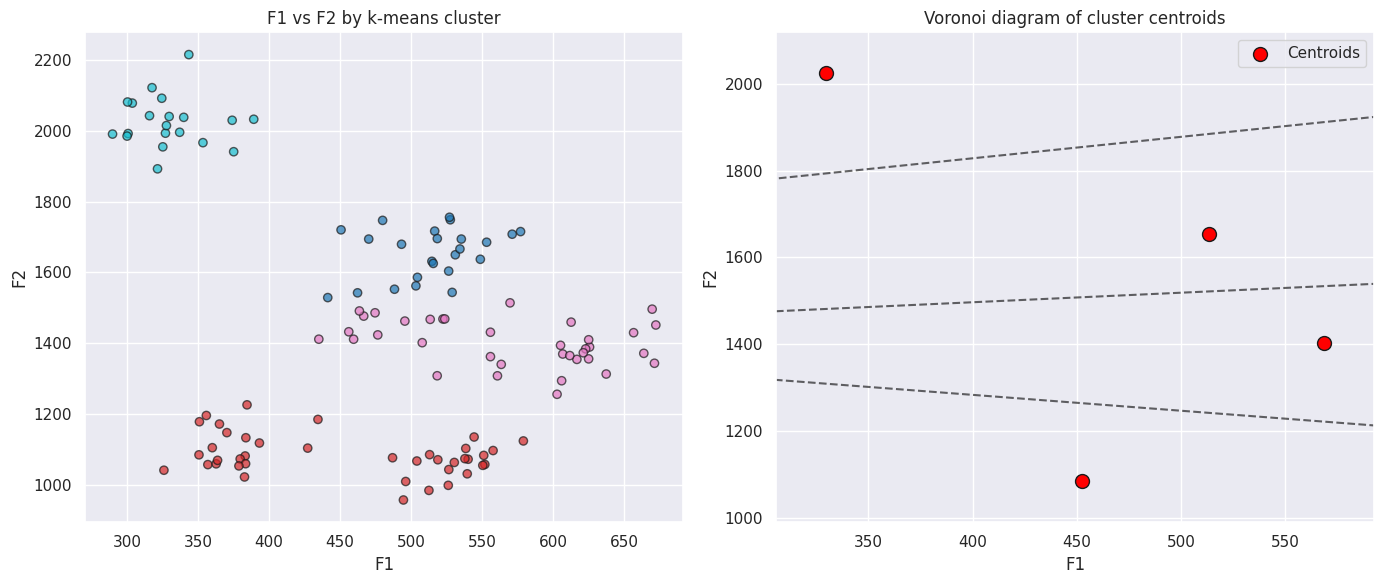

In [21]:
# Question

from scipy.spatial import Voronoi, voronoi_plot_2d
X = mystery_vowels[['F1', 'F2']].values
kmeans_q16 = KMeans(n_clusters=4, n_init=10, random_state=42).fit(X)
y_kmeans_q16 = kmeans_q16.labels_
centroids = kmeans_q16.cluster_centers_
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
axes[0].scatter(X[:, 0], X[:, 1], c=y_kmeans_q16, cmap='tab10', alpha=0.7, edgecolor='k')
axes[0].set_title("F1 vs F2 by k-means cluster")
axes[0].set_xlabel("F1")
axes[0].set_ylabel("F2")

vor = Voronoi(centroids)
voronoi_plot_2d(vor, ax=axes[1], show_vertices=False, line_colors='black', line_width=1.5, line_alpha=0.6, point_size=0)
axes[1].scatter(centroids[:, 0], centroids[:, 1], c='red', s=100, edgecolor='k', label='Centroids')
axes[1].set_title("Voronoi diagram of cluster centroids")
axes[1].set_xlabel("F1")
axes[1].set_ylabel("F2")
axes[1].legend()
plt.tight_layout()

plt.show()

These plots should be legible, as discussed for Homework 5.

## Question 18 (2 points)

For the purposes of this homework, suppose that possible values of $k$ are 3--15.  The vast majority of human languages have a number of vowel categories in this range.

To determine the best value of $k$, we perform Silhouette analysis.  First, write code resulting in a dictionary `silhouette_scores` such that:

* `silhouette_scores[3]` is the mean Silhouette coefficient across all observations for the $k$-means clustering with $k = 3$
* `silhouette_scores[4]` is the same for $k=4$
* etc.


In [22]:
# Question
# Make sure to use the arguments `n_init = 10` and `random_state = 42` for clustering

from sklearn.metrics import silhouette_score
silhouette_scores = {}
for k in range(3, 16):
  kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
  labels = kmeans.fit_predict(X)
  score = silhouette_score(X, labels)
  silhouette_scores[k] = score

print(silhouette_scores)

{3: np.float64(0.6148490116917097), 4: np.float64(0.6130753168480638), 5: np.float64(0.5977977689579712), 6: np.float64(0.5964357889274149), 7: np.float64(0.5342166203071174), 8: np.float64(0.5259560150623539), 9: np.float64(0.5122161855364078), 10: np.float64(0.4761735117528042), 11: np.float64(0.47201796141997787), 12: np.float64(0.45144589587426165), 13: np.float64(0.45468425564764253), 14: np.float64(0.43012101767200533), 15: np.float64(0.4169342600456159)}


## Question 19 (2 points)

Run the following code, which should generate a figure showing the Silhouette coefficient ($y$-axis) as a function of $k$ ($x$-axis):

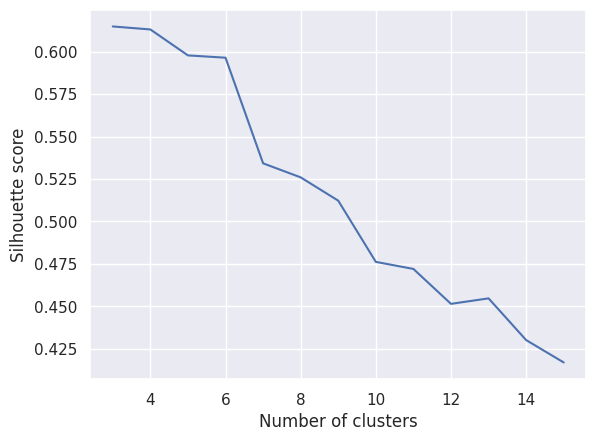

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(x = list(silhouette_scores.keys()), y = list(silhouette_scores.values()))
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

**Question:** What value of $k$ would you choose based on Silhouette analysis?  Briefly justify.

**A19: I would choose k=3 because it has the highest silhouette score, indicating the most well-separated and compact clusters.**




## Question 20 (2 points)


Perform $k$-means clustering using the value of $k$ from Q19. Save the result as `kmeans_q20`, and make a vector `y_kmeans_q20` of the category labels predicted by this clustering.

In [24]:
# Question
# Make sure to use the arguments `n_init = 10` and `random_state = 42` for clustering

X = mystery_vowels
kmeans_q20 = KMeans(n_clusters=3, n_init=10, random_state=42)
kmeans_q20.fit(X[['F1', 'F2']])
y_kmeans_q20 = kmeans_q20.labels_

print(y_kmeans_q20)

[2 2 2 0 1 1 2 2 2 0 1 1 2 2 2 0 1 1 2 2 2 0 1 1 2 2 2 0 1 1 2 2 2 0 1 1 2
 2 2 0 1 1 2 2 2 0 1 1 2 2 2 0 1 1 2 1 2 0 1 1 2 2 2 0 1 1 2 2 2 0 1 1 2 2
 2 0 1 1 2 2 2 0 1 1 2 2 2 0 1 1 2 2 2 0 1 1 2 2 2 0 1 1 2 2 2 0 1 1 2 2 2
 0 1 1 2 2 2 0 1 1]


## Question 21 (3 points)
Make a 1x2 array of F1/F2 plots like in Q17, but now using `kmeans_q20` and  `y_kmeans_q20`.

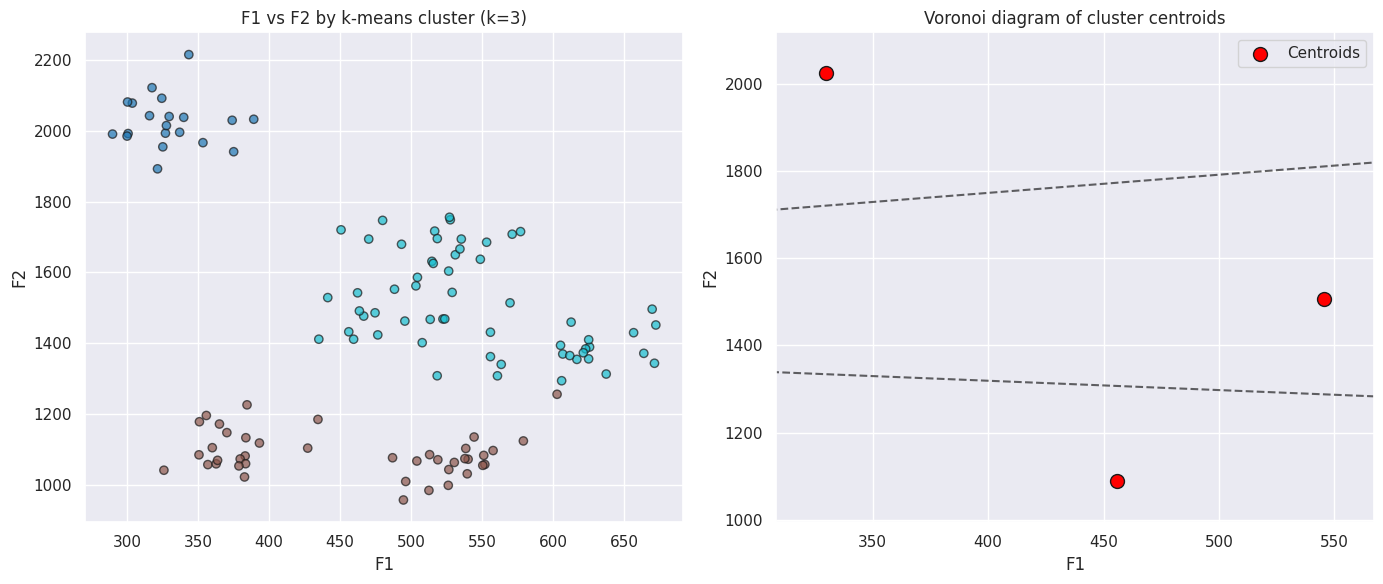

In [25]:
# Question

X = mystery_vowels[['F1', 'F2']].values
kmeans_q20 = KMeans(n_clusters=3, n_init=10, random_state=42).fit(X)
y_kmeans_q20 = kmeans_q20.labels_
centroids = kmeans_q20.cluster_centers_
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
axes[0].scatter(X[:, 0], X[:, 1], c=y_kmeans_q20, cmap='tab10', alpha=0.7, edgecolor='k')
axes[0].set_title("F1 vs F2 by k-means cluster (k=3)")
axes[0].set_xlabel("F1")
axes[0].set_ylabel("F2")

vor = Voronoi(centroids)
voronoi_plot_2d(vor, ax=axes[1], show_vertices=False, line_colors='black', line_width=1.5, line_alpha=0.6, point_size=0)
axes[1].scatter(centroids[:, 0], centroids[:, 1], c='red', s=100, edgecolor='k', label='Centroids')
axes[1].set_title("Voronoi diagram of cluster centroids")
axes[1].set_xlabel("F1")
axes[1].set_ylabel("F2")
axes[1].legend()
plt.tight_layout()

plt.show()

# Section 9

We now try GMM clustering.



## Question 22 (2 points)

We will do GMM clustering for the same range of $k$ as above (3--15), and choose the one with the best BIC.

First: write a function `gmm_k_bic` that takes as inputs:

* `X`: a feature matrix where each column is one feature (like our `X`)
* `k`: the number of components of the GMM

and does the following:

* Fit a GMM with **tied covariance matrix** to `X`
* Return the BIC value for this GMM

In [26]:
# Question
# Make sure to use the arguments `n_init = 10` and `random_state = 42` for clustering

from sklearn.mixture import GaussianMixture
def gmm_k_bic(X, k):
  gmm = GaussianMixture(n_components=k, covariance_type='tied', n_init=10, random_state=42)
  gmm.fit(X)
  return gmm.bic(X)

## Question 23 (2 points)

Write code resulting in a dictionary `gmm_scores` such that:

* `gmm_scores[3]` is the BIC value for the GMM fit to `X` with $k = 3$
* etc.


In [27]:
# Question

gmm_scores = {}
for k in range(3, 16):
  gmm_scores[k] = gmm_k_bic(X, k)

print(gmm_scores)

{3: np.float64(3090.6284470850123), 4: np.float64(3051.3492578046853), 5: np.float64(3041.241409089262), 6: np.float64(2977.8569707635215), 7: np.float64(2984.938209804283), 8: np.float64(2993.432300508493), 9: np.float64(3004.188454490778), 10: np.float64(3016.200767336253), 11: np.float64(3027.163066001966), 12: np.float64(3027.4209313330866), 13: np.float64(3039.8087804014153), 14: np.float64(3052.50292226275), 15: np.float64(3063.2929362263394)}


## Question 24 (2 points)

Run the following code, which should generate a figure showing the BIC ($y$-axis) as a function of $k$ ($x$-axis):

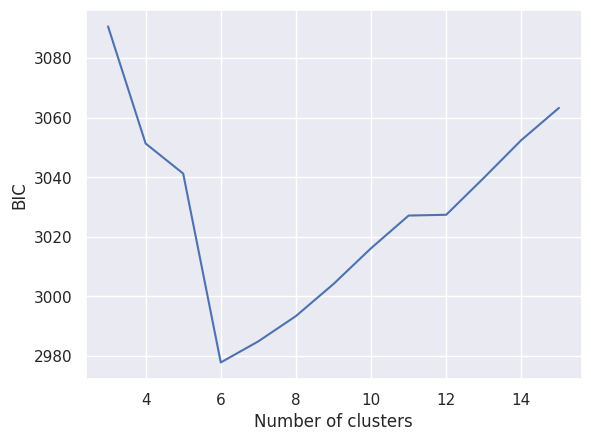

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(x = list(gmm_scores.keys()), y = list(gmm_scores.values()))
plt.xlabel('Number of clusters')
plt.ylabel('BIC')
plt.show()

**Question:** What value of $k$ would you choose based on this plot?  Briefly justify.  

*Hint*: make sure you are considering the right direction for BIC, which is sometimes defined so higher = better and sometimes so lower = better.

**A24: I would choose k=6, because BIC is minimized at this point, indicating the best trade-off between model complexity and fit to the data.**

## Question 25 (2 points)

* Fit a GMM with **tied covariance matrix** using the value of $k$ from Q24 and save the result as `gmm_q25`.
* Make a vector `y_gmm_q25` of the category labels predicted by this clustering.

In [29]:
# Question
# Make sure to use the arguments `n_init = 10` and `random_state = 42` for clustering

gmm_q25 = GaussianMixture(n_components=6, covariance_type='tied', n_init=10, random_state=42)
gmm_q25.fit(X)
y_gmm_q25 = gmm_q25.predict(X)

print(y_gmm_q25)

[3 3 4 2 1 5 0 3 4 2 1 5 0 3 4 2 1 5 0 3 4 2 1 5 0 3 4 2 1 5 0 3 4 2 1 5 0
 3 4 2 1 5 3 3 4 2 1 5 0 3 4 2 1 5 3 3 0 2 1 5 0 3 4 2 1 5 0 3 4 2 1 5 0 3
 4 2 1 5 0 3 4 2 1 5 0 3 4 2 1 5 0 3 4 2 1 5 0 3 4 2 1 5 0 3 4 2 1 5 0 3 4
 2 1 5 0 3 4 2 1 5]


## Question 26 (2 points + 4 points extra credit)
Make a 1x2 array of F1/F2 plots, such that:

* The left plot shows each point colored by its value of `y_gmm_q25` (the predicted category label), like Q17 and Q21 (2 points)
* The right plot shows one 95% confidence ellipse for each category. (4 points extra credit)

While there is code you can adapt for this in the Classification CoLab, it may contain a bug you have to figure out how to fix.  

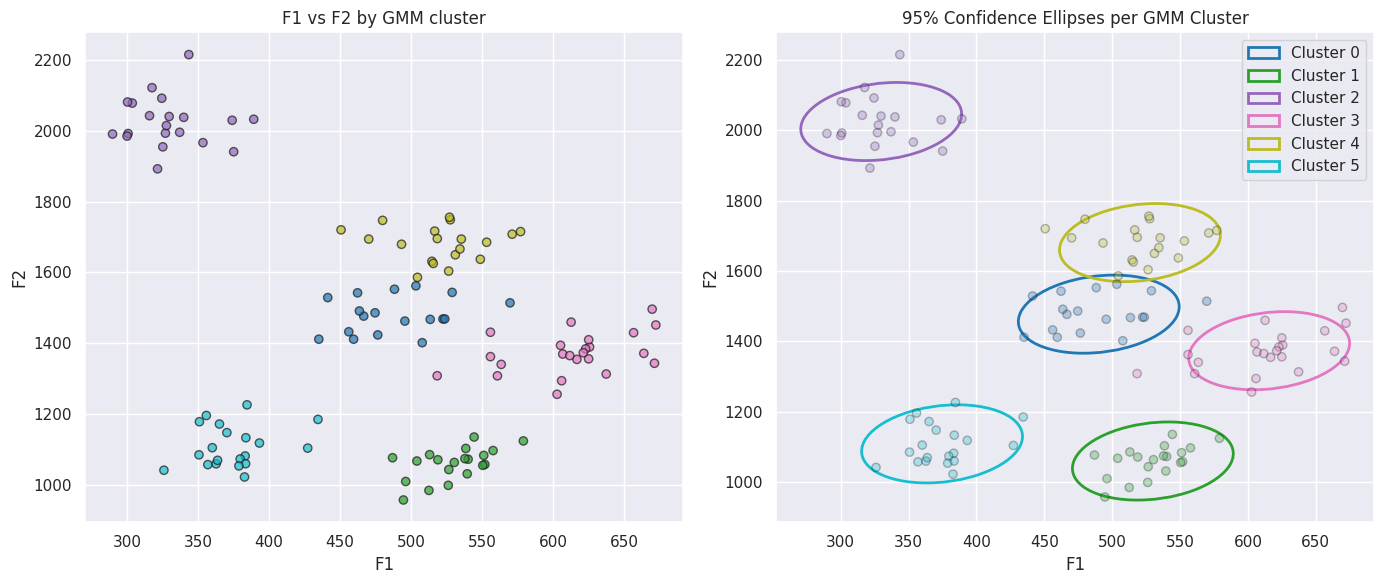

In [30]:
# Question

from matplotlib.patches import Ellipse
X = mystery_vowels[['F1', 'F2']].values
gmm_q25 = GaussianMixture(n_components=6, covariance_type='tied', n_init=10, random_state=42).fit(X)
y_gmm_q25 = gmm_q25.predict(X)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
axes[0].scatter(X[:, 0], X[:, 1], c=y_gmm_q25, cmap='tab10', edgecolor='k', alpha=0.7)
axes[0].set_title("F1 vs F2 by GMM cluster")
axes[0].set_xlabel("F1")
axes[0].set_ylabel("F2")

colors = plt.cm.tab10(np.linspace(0, 1, 6))
means = gmm_q25.means_
cov = gmm_q25.covariances_
for i, (mean, color) in enumerate(zip(means, colors)):
  vals, vecs = np.linalg.eigh(cov)
  order = vals.argsort()[::-1]
  vals, vecs = vals[order], vecs[:, order]
  angle = np.degrees(np.arctan2(*vecs[:, 0][::-1]))
  width, height = 2 * 1.96 * np.sqrt(vals)
  ellipse = Ellipse(mean, width, height, angle=angle, edgecolor=color, facecolor='none', lw=2, label=f'Cluster {i}')
  axes[1].add_patch(ellipse)
axes[1].scatter(X[:, 0], X[:, 1], c=y_gmm_q25, cmap='tab10', edgecolor='k', alpha=0.3)
axes[1].set_title("95% Confidence Ellipses per GMM Cluster")
axes[1].set_xlabel("F1")
axes[1].set_ylabel("F2")
axes[1].legend()
plt.tight_layout()

plt.show()

## Question 27 (3 points)


A common situation in unsupervised learning is different methods giving different results, and the analyst has to decide which is most plausible using domain knowledge. There is no quantitative criterion for this because $y$ is not known.

Compare the clusterings chosen using $k$-means and GMM clustering:

* The $k$ values from Q19 and Q24
* The plots in Q21 and Q26

Which clustering is more plausible? Justify your answer.

**A27: The clustering from Q24 using GMM selected k = 6, while Q19 using k-means chose k = 3. Based on the plots in Q21 and Q26, the GMM clustering (Q26) captures the natural elliptical shapes and varying sizes of the vowel distributions more realistically, whereas the k-means clustering (Q21) imposes rigid, spherical boundaries that miss key structure in the data. Therefore, the GMM clustering is more plausible, as vowel formants often have overlapping, anisotropic distributions better modeled by Gaussian mixtures.**

# To Submit
To submit:
* Name this notebook `YOUR_STUDENT_ID_Assignment_6.ipynb` and download it.
* Convert this `.ipynb` file to a `.pdf` (e.g., using the following instructions).  
* Upload the PDF to the Gradescope assignment "Assignment 6".
   * **<font color='red'>Make sure to match your answers to page numbers when submitting the PDF on Gradescope. Failure to do so will result in UP TO 10 POINTS BEING DEDUCTED.</font>**  
* Submit the `.ipynb` file on myCourses under Assignment 6.

(Note: `Print > Save as PDF` **will not work** because it will not display your figures correctly.)

You can convert the notebook to a PDF using the following instructions.

# Converting this notebook to a PDF

1. Make sure you have renamed the notebook, e.g. `000000000_Assignment_6.ipynb` where `000000000` is your student ID.
2. Make sure to save the notebook (`ctrl/cmd + s`).

Make sure Google Drive is mounted (it likely already is from the first question).

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
!ls "/content/drive/My Drive/Colab Notebooks/"

3. Install packages for converting .ipynb to .pdf

In [ ]:
!apt-get -q install texlive-xetex texlive-fonts-recommended texlive-plain-generic
!apt-get install -y pandoc

4. Convert to PDF (replace `000000000` with your student ID)

In [ ]:
%env STUDENT_ID=000000000
!jupyter nbconvert --to pdf "/content/drive/My Drive/Colab Notebooks/${STUDENT_ID}_Assignment_6.ipynb"

5. Download the resulting PDF file. If you are using Chrome, you can do so by running the following code. On other browsers, you can download the PDF using the file mananger on the left of the screen (Navigate to the file > Right Click > Download).

In [ ]:
import os
from google.colab import files
files.download(f"/content/drive/My Drive/Colab Notebooks/{os.environ['STUDENT_ID']}_Assignment_6.pdf")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

6. Verify that your PDF correctly displays your figures and responses.

7. **<font color='red'>Remember to match your answers to page numbers when submitting the PDF on Gradescope!</font>**